# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [50]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [5]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

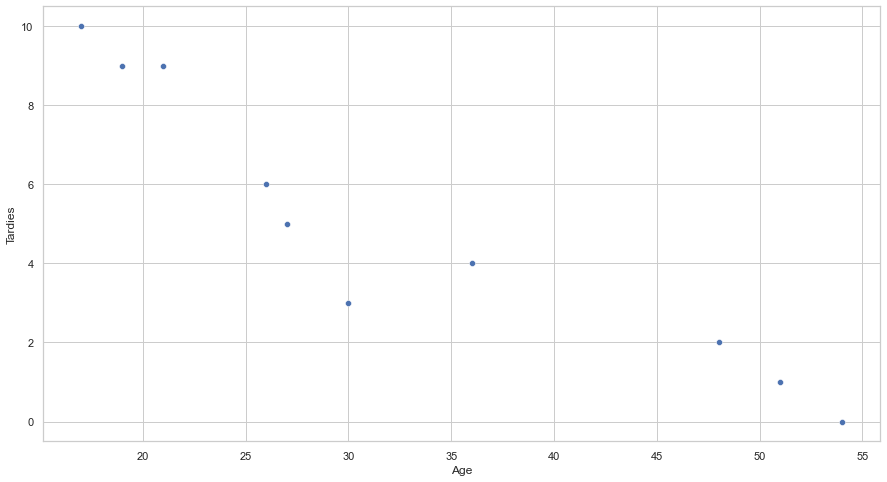

In [7]:
# Your code here.
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here. 
# there appears to be a downward trend on the data that 
# would sugest that as age increases the tardies decrease.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [45]:
# in this case our dependent variable is Tardines since it requires 
# the independant variable of age.

In [44]:
# Your response here.
results = smf.ols("Tardies ~ Age", data = student_data).fit()
results.summary()

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           5.57e-05
Time:                        08:28:58   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Covariance shows you how the two variables differ, 
# whereas correlation shows you how the two variables are related.
# in this case we have a high corrolation of the variables at 0.867
# and we have a relatively low covariance.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [47]:
# i chose linear regresion:

In [13]:
lr = LinearRegression()

In [29]:
# Your response here.
lr.fit(
    X = student_data[["Age"]], 
    y = student_data.Tardies
)

LinearRegression()

In [42]:
# we define the Y-intercept and coeficient

In [30]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [41]:
# Our coeficient and y Interceps are calculated by our LR 
# this will give us the values for our line Y = mx+b

print(f"Y-intercept = {beta_0}", f" Coeficient = {beta_1}")

Y-intercept = 12.888803363135768  Coeficient = -0.2428207709159808


In [46]:
# note: as it be seen our LR with sklearn matches that of the SMF

In [43]:
# i create a new column with the prediction to see how close
# our linear regresion is to our datapoints.

In [31]:
student_data["prediction"] = (student_data.Age * beta_1) + beta_0

In [32]:
student_data.head()

,Age,Tardies,prediction,avg
0,17,10,8.760850,4.9
1,51,1,0.504944,4.9
2,27,5,6.332643,4.9
3,21,9,7.789567,4.9
4,36,4,4.147256,4.9


In [39]:
# our LR prediction is showing that there is verry close to the
# actual number of the scatter plot

In [33]:
student_data["avg"] = student_data.Tardies.mean()
student_data.head()

,Age,Tardies,prediction,avg
0,17,10,8.760850,4.9
1,51,1,0.504944,4.9
2,27,5,6.332643,4.9
3,21,9,7.789567,4.9
4,36,4,4.147256,4.9


In [38]:
# we can se the variation there is of the distribution
# to the mean of the data sample

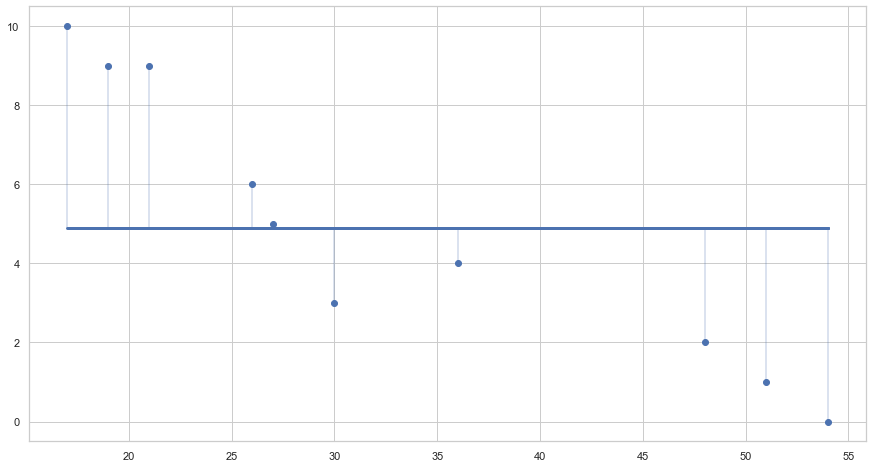

In [36]:
plt.scatter(student_data["Age"],student_data["Tardies"])
plt.plot(student_data["Age"], student_data.avg, lw=3)
plt.vlines(student_data["Age"], student_data.avg, student_data["Tardies"], lw=0.4)

Plot your regression model on your scatter plot.

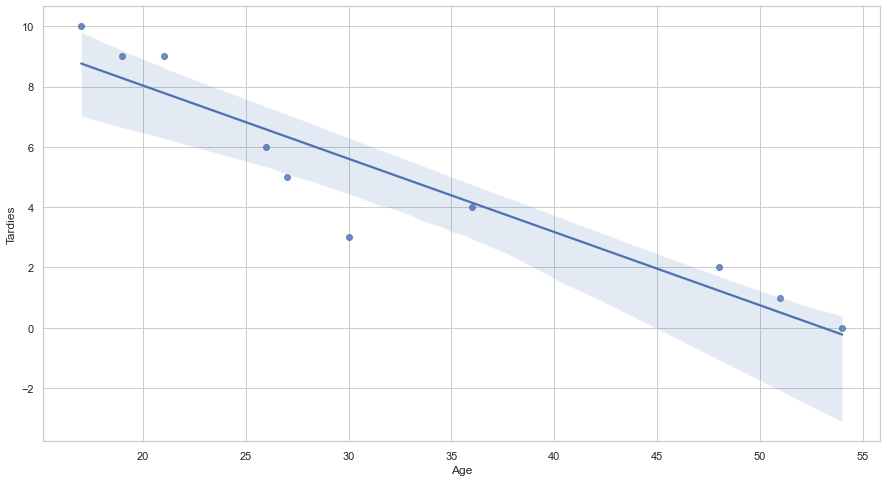

In [37]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [52]:
# the lower the better!
print(f"MAE: ", metrics.mean_absolute_error(student_data.Tardies, student_data.prediction))
print(f"MSE: ", metrics.mean_squared_error(student_data.Tardies, student_data.prediction))
print(f"RMSE: ", np.sqrt(metrics.mean_squared_error(student_data.Tardies, student_data.prediction)))

# the higher and closer to 1 the better
print(f"R2: ", metrics.r2_score(student_data.Tardies, student_data.prediction))

MAE:  0.9319083427082717
MSE:  1.3319201847356268
RMSE:  1.1540884648655088
R2:  0.8820265558250109


In [54]:
# Your response here. 

# acording to the linear regreasion results

# we can see that the RMSE i very low and close to 0
# also aur R2 is very high 

# we can say with a good level of confidence that there 
# is a strong corrolation between age and tardines they are to 
# inversly proportional. as age increases tardines decreases.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data



In [84]:
data_veh = pd.read_csv("./vehicles.csv", index_col=0)

In [85]:
data_veh.head(3)

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [86]:
data_veh_cl = data_veh.rename(columns={"Engine Displacement": "Engine_Displacement",
                   "Vehicle Class": "Vehicle_Class",
                   "Fuel Type": "Fuel_Type",
                   "Fuel Barrels/Year": "Fuel_Barrels_Year",
                   "City MPG": "City_MPG",
                   "Highway MPG": "Highway_MPG",
                   "Combined MPG": "Combined_MPG",
                   "CO2 Emission Grams/Mile": "CO2_Emission_Grams_Mile",
                   "Fuel Cost/Year": "Fuel_Cost_Year",
                  })

In [87]:
data_veh_cl.head(3)

,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
Make,,,,,,,,,,,,,,
AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


In [88]:
# the following is a corrolation matrix of all the variables
# this might not be very legible and a bit tedious.

In [89]:
data_veh_cl.corr()

,Year,Engine_Displacement,Cylinders,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine_Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel_Barrels_Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City_MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway_MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined_MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2_Emission_Grams_Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel_Cost_Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [90]:
# we are going to display it in a heat map so that we can see those
# variables that have strong corrolation.
# looking at the graph, CO2 hasa stron corrolation 
# with all variable, some inverse and other direct. 

<AxesSubplot:>

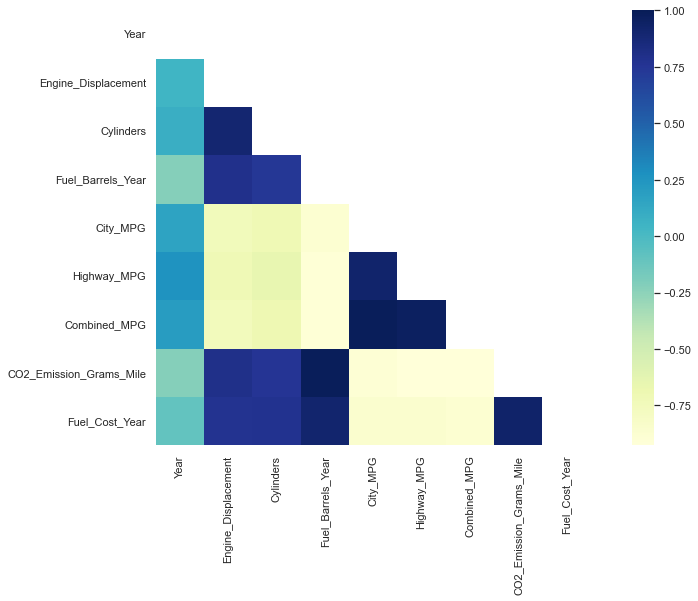

In [91]:
corr = data_veh_cl.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu", mask=mask, vmax=1, square=True)

In [92]:
# Calculating the summary of the LR for the variables 

#Dependent variable:
    #CO2_Emission_Grams/Mile
    

#Independent variables:
    # Year, Cylinders, Fuel Barrels/Year, 
    # Combined MPG, and Fuel Cost/Year. 

In [93]:
# Your response here. 
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data = data_veh_cl).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                             09:23:36   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [99]:
# according to SMF, we can use the coeficients to build our linear model

In [94]:
beta_0= 769.8883
beta_1= -0.3206
beta_2= 1.8788
beta_3= 19.0529
beta_4= -3.0404
beta_5= 0.0323

In [100]:
# the following formula would be our linear model applied and displayed 

In [95]:
data_veh_cl["prediction"] = (data_veh_cl.Year * beta_1) + (data_veh_cl.Cylinders * beta_2) + (data_veh_cl.Fuel_Barrels_Year * beta_3) + (data_veh_cl.Combined_MPG * beta_4)+ (data_veh_cl.Fuel_Cost_Year * beta_5)+ beta_0

In [101]:
# Proceed to see the linear model prediction vs the CO2 emmisions
# it looks like its very close.

In [98]:
data_veh_cl.sample(3)

,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year,prediction
Make,,,,,,,,,,,,,,,
BMW,5 Series,1985,3.4,6.0,Manual 5-spd,Rear-Wheel Drive,Compact Cars,Regular,19.388824,14,20,17,522.764706,1950,525.481616
Nissan,300ZX,1990,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Two Seaters,Premium,17.347895,17,22,19,467.736842,2150,485.372204
Mercedes-Benz,E320 Coupe,1994,3.2,6.0,Automatic 4-spd,Rear-Wheel Drive,Subcompact Cars,Premium,17.347895,17,23,19,467.736842,2150,484.089804


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [102]:
# lets check how good is or prediction by using ,metrics to mesure the error.

In [103]:
# Your response here. 

# the lower the better!
print(f"MAE: ", metrics.mean_absolute_error(data_veh_cl.CO2_Emission_Grams_Mile, data_veh_cl.prediction))
print(f"MSE: ", metrics.mean_squared_error(data_veh_cl.CO2_Emission_Grams_Mile, data_veh_cl.prediction))
print(f"RMSE: ", np.sqrt(metrics.mean_squared_error(data_veh_cl.CO2_Emission_Grams_Mile, data_veh_cl.prediction)))

# the higher and closer to 1 the better
print(f"R2: ", metrics.r2_score(data_veh_cl.CO2_Emission_Grams_Mile, data_veh_cl.prediction))

MAE:  7.488398867273616
MSE:  271.1199073022345
RMSE:  16.46571915533101
R2:  0.9808734742328644


In [105]:
# the R2 tells us that there is a strong corrolation with our linear model
#  RMSE is low and also indicates our model is good because its a low number.
# in the case or MSE the number is low so there is low error in the model
# the MAE is low indicating low error

# we accept the model but would explor a model that would explain the behaiviour with 
# more certainty.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 